In [1]:
using PyPlot

## Cálculo de magnitud local para la región del Bajío, México.
Marzo 21,2018

El presente trabajo consiste en establecer una relación que permita estimar magnitudes locales mediante amplitudes registradas. 

Richter (1935) definió la magnitud de un sismo como:   

 $ M_l= log A - log A_0$
 
 Donde A es la amplitud máxima registrada en mm y $A_0$ es la amplitud  máxima que registraría un sismómetro si un sismo de Magnitud 0 ocurriera a una distancia similar a la que ocurrió A, en el caso de California a los 100 km corresponde a 1 mm. Es importante mencionar que este cálculo esta hecho con base en los parámetros del sismómetro Wood-Anderson, y que además influyen otros factores como la dispersión geométrica y la atenuación que en este caso no serán tomados en cuenta. Con esta relación podemos notar que cuanto menores sean las amplitudes registradas menor será también la magnitud. $A_0$ es el parámetro que es dependiente de la distancia al epicentro y de la geología que define como serán las amplitudes para cierta región.
 

Para este estudio se usaron 32 eventos registrados entre el 05/05 y el 23/06 del 2011 en las estaciones XXXX (agregar nombres y coordenadas y tipo de equipos). El análisis de las señales fue realizado en el programa SEISAN. Este programa permite quitar la respuesta instrumental de las trazas y convolucionarlas con la del sismómetro WA para obtener directamente las amplitudes máximas necesarias para el cálculo, siguiendo la metodología descrita por Richter (1935) la amplitud máxima usada para la regresión lineal es el promedio de las amplitudes máximas medidas en las dos componentes horizontales. Para el cálculo del epicentro a la estación se tomo en cuenta el intevalo S-P en segundos multiplicandolo por un factor de 8 para obtener la distancia en km.


In [2]:
tabla=readdlm("amplitudes.txt",skipstart=1)
logam=tabla[:,8]
dist=tabla[:,10]

32-element Array{Float64,1}:
 32.8 
  8.0 
 14.4 
 10.4 
 33.6 
 29.6 
  7.76
  8.8 
  9.6 
  6.4 
  3.2 
  8.0 
  4.8 
  ⋮   
 19.2 
  8.0 
 11.2 
 22.4 
 21.6 
 19.2 
 36.8 
 19.2 
 20.0 
 20.0 
 12.0 
 36.8 

In [21]:
##Regresión lineal y=mx+b

#n=32
sumx=sum(logam)
sumy=sum(dist)
sumxy=sum(logam.*dist)
sumx2=sum(logam.*logam)

println(sumx)

46.39529379999999


In [27]:
m=((32*sumxy)-(sumx*sumy))/((32sumx2)-(sumx*sumx))

b=(sumy-(m*sumx))/(32)

y=m.*dist + b

println(m)
println(b)

-0.4163333530241562
20.04612213225921


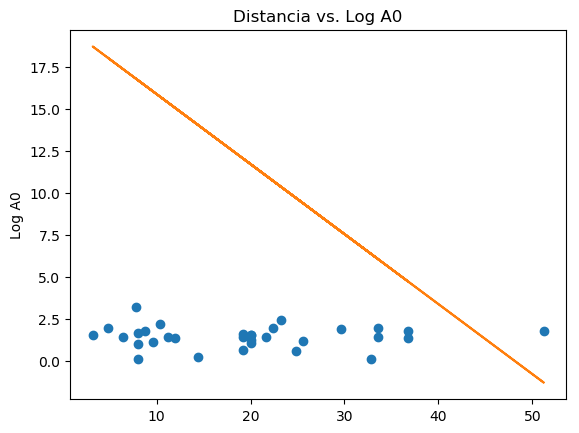

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000033D1C18>

In [10]:
plot(dist,logam, "o")
ylabel("Log A0")

title("Distancia vs. Log A0")
plot(dist,y)


La regresión lineal nos devuelve una ecuación cuya fórmula es:  

 $log A_0 = -0.4163 (dist) + 20.04 $
 
Sustituyendo en la ecuación propuesta por Richter obtenemos que la magnitud local para la región del Bajío:

$M_l = log A + 0.4163(dist) -20.04 $

Donde A es la amplitud máxima registrada y y dist es la distancia del epicentro a la estación en km.
